<a href="https://colab.research.google.com/github/jeffheaton/app_deep_learning/blob/main/t81_558_class_07_4_stable_diff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T81-558: Applications of Deep Neural Networks

**Module 7: Image Generative Models**

- Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
- For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).


# Module 7 Material

- Part 7.1 Introduction to Generative AI [[Video]](https://www.youtube.com/watch?v=2FbkbSnS8sg&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_07_1_img_generative.ipynb)
- Part 7.2 Generating Faces with StyleGAN3 [[Video]](https://www.youtube.com/watch?v=VcI2o1yEQa0&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_07_2_gan_intro.ipynb)
- Part 7.3 GANS to Enhance Old Photographs Deoldify [[Video]](https://www.youtube.com/watch?v=y7HvjfKsZ50&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_07_3_deoldify.ipynb)
- **Part 7.4 Text to Images with StableDiffusion** [[Video]](https://www.youtube.com/watch?v=gLj6-gJ-lR4&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_07_4_stable_diff.ipynb)
- Part 7.5 Finetuning with Dreambooth [[Video]](https://www.youtube.com/watch?v=G_FYFSzkB5Y&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_07_5_dream_booth.ipynb)

# Google CoLab Instructions

The following code ensures that Google CoLab is running the correct version of TensorFlow.


In [1]:
try:
    import google.colab
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: using Google CoLab


# Part 7.4 Text to Images with StableDiffusion

We will now see how to use Stable Diffusion to create various images from textual prompts. There will be four settings that we will deal with as we generate these images.

* **model**: We will use the trained/finetuned model. Different models are optimized for different types of images.
* **prompt**: Text that you provide to describe what sort of image you would like created.
* **negative prompt**: Text that you describe elements that should not be present in your image.
* **seed**: The same image for the prompt/negative prompt will always be produced for the same seed. To get a different image for the same prompts, change the seed.

We will begin by installing Stable Diffusion into Google CoLab.

In [2]:
!pip install --upgrade diffusers[torch]
!pip install k_diffusion
!pip install transformers scipy ftfy accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.1/797.1 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 109.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Basic Models

To make use of Stable Diffusion we will use the HuggingFace DiffusionPipeline. When setting up the pipeline we specify to use the "CompVis/stable-diffusion-v1-4" model, which is a basic model created to be used with StableDiffusion. The following code sets up this model and downloads it from HuggingFace.

In [3]:
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    custom_pipeline="lpw_stable_diffusion",
    torch_dtype=torch.float16
)
pipe=pipe.to("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

v0.31.0/lpw_stable_diffusion.py:   0%|          | 0.00/74.7k [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

We will begin by creating a simple picture of an astronaut playing golf on the moon! We first use the seed of 100, you could also use -1 to request a random seed. We specify both the prompt and negative prompt.

This pipeline does contain code to ensure that no images generated are "not safe for work" (NSFW). This setting tries to protect you from unsafe images. If such an image is generated, you will see the following message.

```
Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.
```

You may wish to disable this feature. To do this, uncomment the pipe.safety_checker line. Be cafeful, if you do disable this, as unsafe images may be generated containing NSFW themes, which might contain violence, nudity, or sexual themes.

The following code generates the astronaut image.

  0%|          | 0/50 [00:00<?, ?it/s]

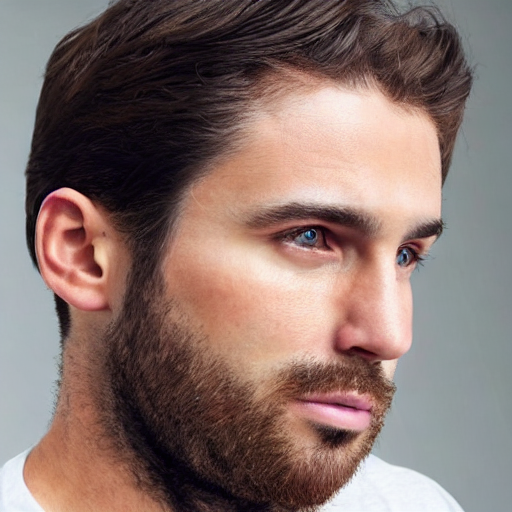

In [10]:
# Random number seed, -1 for random seed
seed = 100 #-1
seed = random.randint(0, 2**32) if seed == -1 else seed
generator = torch.Generator(device='cuda').manual_seed(int(seed))

# Prompts to generate
prompt= """
A generic adult male face, neutral expression, clean-shaven, no distinctive features, symmetrical and realistic proportions, natural skin texture, frontal view, centered composition, natural lighting, photorealistic, plain white background, DSLR quality, high resolution"""

neg_prompt = """
signature, watermark
"""

#pipe.safety_checker = lambda images, clip_input: (images, False)
pipe.text2img(prompt, negative_prompt=neg_prompt, width=512,height=512,
              max_embeddings_multiples=3,generator=generator).images[0]

## Realistic Models

You might like to try adjusting the code in the previous section to create other images. If you are trying to create images of people, you will be better served with a model like Realistic Vision, which will be demonstrated in this section. The following code loads Realistic Vision.

In [11]:
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained(
    #'hakurei/waifu-diffusion',
    "SG161222/Realistic_Vision_V2.0",
    custom_pipeline="lpw_stable_diffusion",
    generator=generator,
    torch_dtype=torch.float16
)
pipe=pipe.to("cuda")

model_index.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.89k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Keyword arguments {'generator': <torch._C.Generator object at 0x7ec35fa57b10>} are not expected by StableDiffusionLongPromptWeightingPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--SG161222--Realistic_Vision_V2.0/snapshots/aaa388343c7f35f6416eea9d29574a4d1ad59817/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--SG161222--Realistic_Vision_V2.0/snapshots/aaa388343c7f35f6416eea9d29574a4d1ad59817/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--SG161222--Realistic_Vision_V2.0/snapshots/aaa388343c7f35f6416eea9d29574a4d1ad59817/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--SG161222--Realistic_Vision_V2.0/snapshots/aaa388343c7f35f6416eea9d29574a4d1ad59817/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


We now generate an image with a much more complex prompt. The positive and negative prompts describe how to generate an image of a young woman. Stable diffusion prompts are usually comma separated lists of attributes to draw. You will notice that some are enclosed in paranthesis; which designates that this attribute is more important. A number, near the end, separated by a colon specifies how important.

  0%|          | 0/50 [00:00<?, ?it/s]

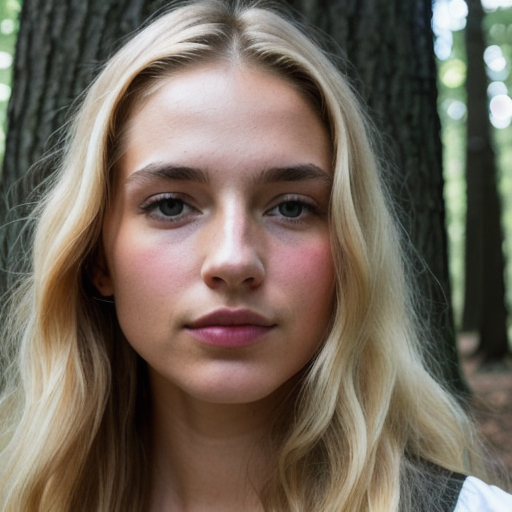

In [15]:
# Random number seed, -1 for random seed
seed = 102 #-1
seed = random.randint(0, 2**32) if seed == -1 else seed
generator = torch.Generator(device='cuda').manual_seed(int(seed))

# Prompts to generate
prompt= """
(woman age 26 standing by tree), (long blonde hair:1.2), ray traced shadows,
RAW, 8k, (eczema:0.7), (sub-surface scattering:1.55), (sweat:1.22), (freckles:0.55),
highly detailed skin, (Acne:0.7), (FACE1:0.5), (FACE2:1.2), (FACE3:0.85),
perfect eyes, no makeup. (skin spores:1.05), (skin spores:1.05),
ultra detailed face, ultra detailed skin, film grain, ray tracing, studio lighting"""

neg_prompt = """
signature, watermark, airbrush, photoshop, plastic doll,
(ugly eyes, deformed iris, deformed pupils, fused lips and teeth:1.2),
(un-detailed skin, semi-realistic, cgi, 3d, render, sketch, cartoon,
drawing, anime:1.2), text, close up, cropped, out of frame, worst quality,
low quality, jpeg artifacts, ugly, duplicate, morbid, mutilated, extra fingers,
mutated hands, poorly drawn hands, poorly drawn face, mutation, deformed, blurry,
dehydrated, bad anatomy, bad proportions, extra limbs, cloned face, disfigured,
gross proportions, malformed limbs, missing arms, missing legs, extra arms,
extra legs, fused fingers, too many fingers, long neck, head wear, masculine,
obese, fat, out of frame"""

#pipe.safety_checker = lambda images, clip_input: (images, False)
pipe.text2img(prompt, negative_prompt=neg_prompt, width=512,height=512,
              max_embeddings_multiples=3,generator=generator).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

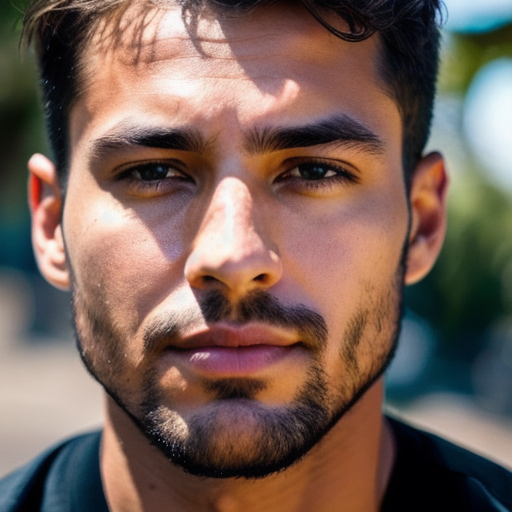

In [13]:
# Random number seed, -1 for random seed
seed = 102 #-1
seed = random.randint(0, 2**32) if seed == -1 else seed
generator = torch.Generator(device='cuda').manual_seed(int(seed))

# Prompts to generate
prompt= """
(man age 30 sitting on a bench), (short brown hair:1.2), ray traced shadows,
RAW, 8k, (mild stubble:1.1), (sub-surface scattering:1.55), (natural sweat:1.15), (light freckles:0.45),
highly detailed skin, (pores:0.8), (FACE1:0.65), (FACE2:1.1), (FACE3:0.9),
sharp jawline, perfect symmetrical eyes, no visible scars or makeup,
(skin pores:1.05), ultra detailed face, ultra detailed skin,
film grain, ray tracing, studio lighting"""

neg_prompt = """
signature, watermark, airbrush, photoshop, plastic doll,
(ugly eyes, deformed iris, deformed pupils, fused lips and teeth:1.2),
(un-detailed skin, semi-realistic, cgi, 3d, render, sketch, cartoon,
drawing, anime:1.2), text, close up, cropped, out of frame, worst quality,
low quality, jpeg artifacts, ugly, duplicate, morbid, mutilated, extra fingers,
mutated hands, poorly drawn hands, poorly drawn face, mutation, deformed, blurry,
dehydrated, bad anatomy, bad proportions, extra limbs, cloned face, disfigured,
gross proportions, malformed limbs, missing arms, missing legs, extra arms,
extra legs, fused fingers, too many fingers, long neck, head wear, masculine,
obese, fat, out of frame"""

#pipe.safety_checker = lambda images, clip_input: (images, False)
pipe.text2img(prompt, negative_prompt=neg_prompt, width=512,height=512,
              max_embeddings_multiples=3,generator=generator).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

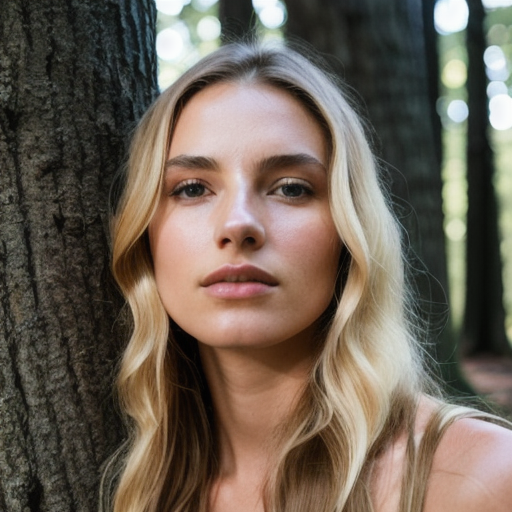

In [14]:
# Random number seed, -1 for random seed
seed = 102 #-1
seed = random.randint(0, 2**32) if seed == -1 else seed
generator = torch.Generator(device='cuda').manual_seed(int(seed))

# Prompts to generate
prompt= """
(woman age 26 standing by a tree), (long blonde hair:1.2), ray traced shadows,
RAW, 8k, (light eczema:0.7), (sub-surface scattering:1.55), (natural sweat:1.22), (light freckles:0.55),
highly detailed skin, (mild acne:0.7), (FACE1:0.5), (FACE2:1.2), (FACE3:0.85),
perfect eyes, no makeup, (skin pores:1.05), ultra detailed face, ultra detailed skin,
film grain, ray tracing, studio lighting"""

neg_prompt = """
signature, watermark, airbrush, photoshop, plastic doll,
(ugly eyes, deformed iris, deformed pupils, fused lips and teeth:1.2),
(un-detailed skin, semi-realistic, cgi, 3d, render, sketch, cartoon,
drawing, anime:1.2), text, close up, cropped, out of frame, worst quality,
low quality, jpeg artifacts, ugly, duplicate, morbid, mutilated, extra fingers,
mutated hands, poorly drawn hands, poorly drawn face, mutation, deformed, blurry,
dehydrated, bad anatomy, bad proportions, extra limbs, cloned face, disfigured,
gross proportions, malformed limbs, missing arms, missing legs, extra arms,
extra legs, fused fingers, too many fingers, long neck, head wear, masculine,
obese, fat, out of frame"""

#pipe.safety_checker = lambda images, clip_input: (images, False)
pipe.text2img(prompt, negative_prompt=neg_prompt, width=512,height=512,
              max_embeddings_multiples=3,generator=generator).images[0]

## Anime Models

If you would like to generate cartoon or Anime style images, the waifu-diffusion model will work nicely. The code below loads this model and generates an Anime character.

In [ ]:
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained(
    "hakurei/waifu-diffusion",
    custom_pipeline="lpw_stable_diffusion",
    generator=generator,
    torch_dtype=torch.float16
)
pipe=pipe.to("cuda")

model_index.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.89k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/620 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/819 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

  0%|          | 0/50 [00:00<?, ?it/s]

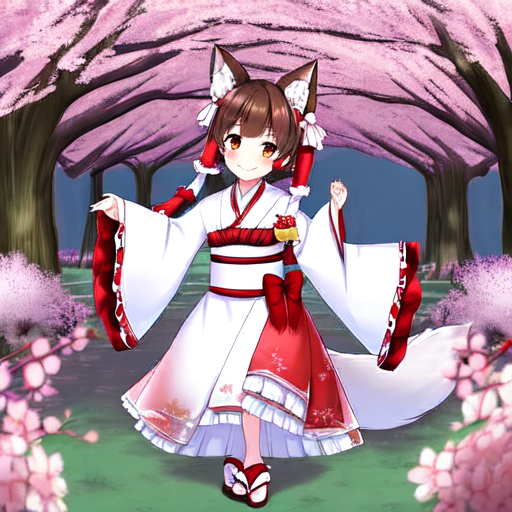

In [ ]:
prompt = """
best_quality (1girl:1.3) bow bride brown_hair closed_mouth frilled_bow
frilled_hair_tubes frills (full_body:1.3) fox_ear hair_bow hair_tubes
happy hood japanese_clothes kimono long_sleeves red_bow smile solo tabi
uchikake white_kimono wide_sleeves cherry_blossoms"""
neg_prompt = """
lowres, bad_anatomy, error_body, error_hair, error_arm, error_hands, bad_hands,
error_fingers, bad_fingers, missing_fingers, error_legs, bad_legs, multiple_legs,
missing_legs, error_lighting, error_shadow, error_reflection, text, error,
extra_digit, fewer_digits, cropped, worst_quality, low_quality, normal_quality,
jpeg_artifacts, signature, watermark, username, blurry"""

# Random number seed, -1 for random seed
seed = 105 #-1
seed = random.randint(0, 2**32) if seed == -1 else seed
generator = torch.Generator(device='cuda').manual_seed(int(seed))

# Generate the image
pipe.text2img(prompt, negative_prompt=neg_prompt, width=512,height=512,
              max_embeddings_multiples=3,generator=generator).images[0]